# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_key import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
# Connection information for OpenWeatherMap Site
url = "http://api.openweathermap.org/data/2.5/weather?q="

#Initalize lists 
cityname   = []
cloudiness = []
country    = []
date       = []
humidity   = []
lat        = []
lon        = []
max_temp   = []
wind_speed = []
count = 1
total_cities = len(cities)

# Loop through each city an extract weather data per city
for cit in cities:
    response = requests.get(url + cit + api_key)
    data = response.json()
    
    # Skip city if not found on Site
    if(data['cod'] == '404'):
        print ("The city of " + cit + " was not found in API database. Skipping...")
        continue
        
    cityname.append(data['name'])
    print("Processing City: " + data['name'] + ", " + data['sys']['country'] + " ... " + str(count) + " of " + str(total_cities) )
    count = count + 1
    cloudiness.append(data['clouds']['all'])
    country.append(data['sys']['country'])
    date.append(data['dt'])
    humidity.append(data['main']['humidity'])
    lat.append(data['coord']['lat'])
    lon.append(data['coord']['lon'])
    max_temp.append(data['main']['temp_max'])
    wind_speed.append(data['wind']['speed'])
    
# Combine data and create weather_data dataframe
print ("Processing complete...")
weather_data = list(zip(cityname, cloudiness, country, date, humidity, lat, lon, max_temp, wind_speed))
df = pd.DataFrame(weather_data)
df.columns = ["Cityname", "Cloudiness", "Country","Date", "Humidity", "Lat", "Lon", "Max Temp", "Wind Speed"]

The city of tumannyy was not found in API database. Skipping...
The city of khonuu was not found in API database. Skipping...
Processing City: Punta Arenas, CL ... 1 of 644
The city of marcona was not found in API database. Skipping...
Processing City: Rikitea, PF ... 2 of 644
Processing City: Albany, US ... 3 of 644
Processing City: Provideniya, RU ... 4 of 644
Processing City: Port Shepstone, ZA ... 5 of 644
Processing City: Paka, HR ... 6 of 644
The city of kamenskoye was not found in API database. Skipping...
Processing City: Cabo San Lucas, MX ... 7 of 644
Processing City: Tiksi, RU ... 8 of 644
Processing City: Souillac, FR ... 9 of 644
Processing City: Hilo, US ... 10 of 644
Processing City: Coruripe, BR ... 11 of 644
Processing City: Hobart, AU ... 12 of 644
Processing City: New Norfolk, AU ... 13 of 644
The city of karakendzha was not found in API database. Skipping...
Processing City: Burgeo, CA ... 14 of 644
The city of mentok was not found in API database. Skipping...
Proce

Processing City: Monrovia, LR ... 155 of 644
Processing City: Kapaa, US ... 156 of 644
Processing City: Glendive, US ... 157 of 644
Processing City: Tagab, AF ... 158 of 644
Processing City: Tabas, IR ... 159 of 644
Processing City: Vestmannaeyjar, IS ... 160 of 644
Processing City: Buala, SB ... 161 of 644
Processing City: Kaitangata, NZ ... 162 of 644
Processing City: Vila Vicosa, PT ... 163 of 644
Processing City: Marystown, CA ... 164 of 644
Processing City: Labuhan, ID ... 165 of 644
Processing City: Muros, ES ... 166 of 644
Processing City: Bowen, AU ... 167 of 644
Processing City: Meulaboh, ID ... 168 of 644
Processing City: Pingliang, CN ... 169 of 644
Processing City: Flagstaff, US ... 170 of 644
Processing City: Barcelos, PT ... 171 of 644
Processing City: Padang, ID ... 172 of 644
Processing City: Mecca, SA ... 173 of 644
Processing City: Turayf, SA ... 174 of 644
Processing City: Shihezi, CN ... 175 of 644
Processing City: Cherskiy, RU ... 176 of 644
Processing City: Pangod

Processing City: Aklavik, CA ... 318 of 644
Processing City: Camacupa, AO ... 319 of 644
Processing City: Bosaso, SO ... 320 of 644
Processing City: Antalaha, MG ... 321 of 644
Processing City: Cairo, EG ... 322 of 644
Processing City: Arivonimamo, MG ... 323 of 644
Processing City: North Myrtle Beach, US ... 324 of 644
Processing City: Kalispell, US ... 325 of 644
Processing City: Morehead, US ... 326 of 644
Processing City: Champerico, MX ... 327 of 644
Processing City: Priargunsk, RU ... 328 of 644
Processing City: Nome, US ... 329 of 644
Processing City: Sistranda, NO ... 330 of 644
Processing City: San Javier, ES ... 331 of 644
Processing City: Mabaruma, GY ... 332 of 644
Processing City: Sarila, IN ... 333 of 644
Processing City: Djougou, BJ ... 334 of 644
Processing City: Ghazipur, IN ... 335 of 644
Processing City: Mashhad, IR ... 336 of 644
Processing City: Nouadhibou, MR ... 337 of 644
Processing City: Inhambane, MZ ... 338 of 644
Processing City: Haines Junction, CA ... 339 

Processing City: Puerto Leguizamo, CO ... 481 of 644
Processing City: Totness, US ... 482 of 644
Processing City: Sao Felix do Xingu, BR ... 483 of 644
Processing City: Auray, FR ... 484 of 644
Processing City: Fort Wellington, GY ... 485 of 644
Processing City: Tianpeng, CN ... 486 of 644
Processing City: Nacala, MZ ... 487 of 644
Processing City: Mwinilunga, ZM ... 488 of 644
Processing City: Muswellbrook, AU ... 489 of 644
The city of attawapiskat was not found in API database. Skipping...
The city of asfi was not found in API database. Skipping...
Processing City: Port Hardy, CA ... 490 of 644
Processing City: Uige, AO ... 491 of 644
Processing City: Urazovo, RU ... 492 of 644
Processing City: Muroto, JP ... 493 of 644
Processing City: Jiexiu, CN ... 494 of 644
Processing City: Fallon, US ... 495 of 644
Processing City: Aswan, EG ... 496 of 644
Processing City: Ambon, FR ... 497 of 644
The city of gardan diwal was not found in API database. Skipping...
Processing City: Lock Haven, 

In [6]:
df.to_csv(output_data_file)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Export dataframe to csv file
df.to_csv(output_data_file)

In [8]:
#Display Dataframe head
df.head(10)

,Cityname,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Punta Arenas,75,CL,1546916400,75,-53.16,-70.91,281.150,4.10
1,Rikitea,76,PF,1546918713,94,-23.12,-134.97,300.263,5.50
2,Albany,90,US,1546917420,41,42.65,-73.75,269.250,5.10
3,Provideniya,0,RU,1546918713,100,64.42,-173.23,256.638,14.00
4,Port Shepstone,92,ZA,1546918713,88,-30.74,30.45,295.138,5.85
5,Paka,0,HR,1546916400,92,45.29,18.06,266.150,2.60
6,Cabo San Lucas,20,MX,1546915620,88,22.89,-109.91,294.150,2.00
7,Tiksi,24,RU,1546918715,47,71.64,128.87,239.088,1.20
8,Souillac,90,FR,1546916400,100,45.60,-0.60,279.150,2.10
9,Hilo,75,US,1546915980,64,19.71,-155.08,297.550,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

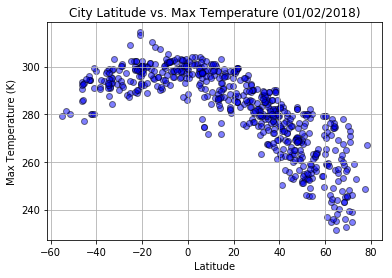

In [9]:
plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs. Max Temperature (01/02/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.grid()
plt.savefig("../Images/lat_vs_max_temp.png")

#### Latitude vs. Humidity Plot

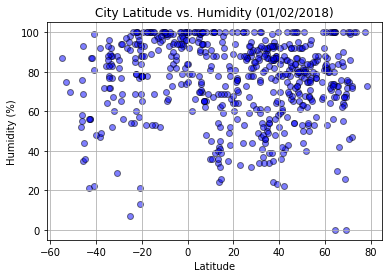

In [10]:
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs. Humidity (01/02/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

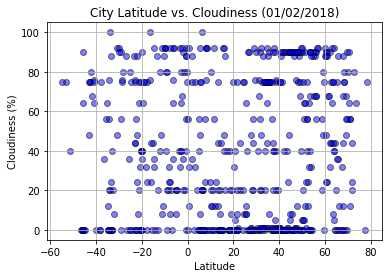

In [11]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs. Cloudiness (01/02/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../Images/lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

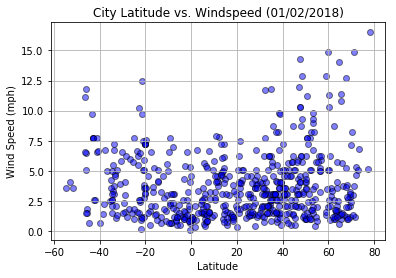

In [12]:
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs. Windspeed (01/02/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/lat vs windspeed.png")